In [1]:
cd /content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction


/content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction/flight-fare-prediction-mh.zip" -d "/content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction"

Archive:  /content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction/flight-fare-prediction-mh.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction/Data_Train.xlsx  
  inflating: /content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction/Sample_submission.xlsx  
  inflating: /content/drive/MyDrive/Colab Notebooks/End to End project/Flight fare prediction/Test_set.xlsx  


# Importing dataset
> 1. Since data is in form of excel file we have to use pandas read_excel to load the data
> 2. After loading it is important to check the complete information of data as it can indication many of the hidden information such as null values in  a columns or a row
> 3. Check whether any null values are there or not.If it is present then following can be done.
>> A. Impution data using imputation method in sklear<br>
>> B. Filling NaN values with mean,median and mode using fillna() method
> 4. Describe data --> which can give statistical analysis 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [4]:
train_data = pd.read_excel(r'Data_Train.xlsx')
pd.set_option('display.max_columns',None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
 train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# EDA

In [ ]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

#### Airline EDA

In [ ]:
airline_stats = train_data.Airline.describe().values
print("Total Airline present in dataset: ",airline_stats[0])
print('Total Missing values are: ',train_data.Airline.isnull().sum())
print('Total unique Airline are: ',airline_stats[1])
print('Top Airline is {} with Frequency {}'.format(airline_stats[2],airline_stats[3]))

Total Airline present in dataset:  10683
Total Missing values are:  0
Total unique Airline are:  12
Top Airline is Jet Airways with Frequency 3849


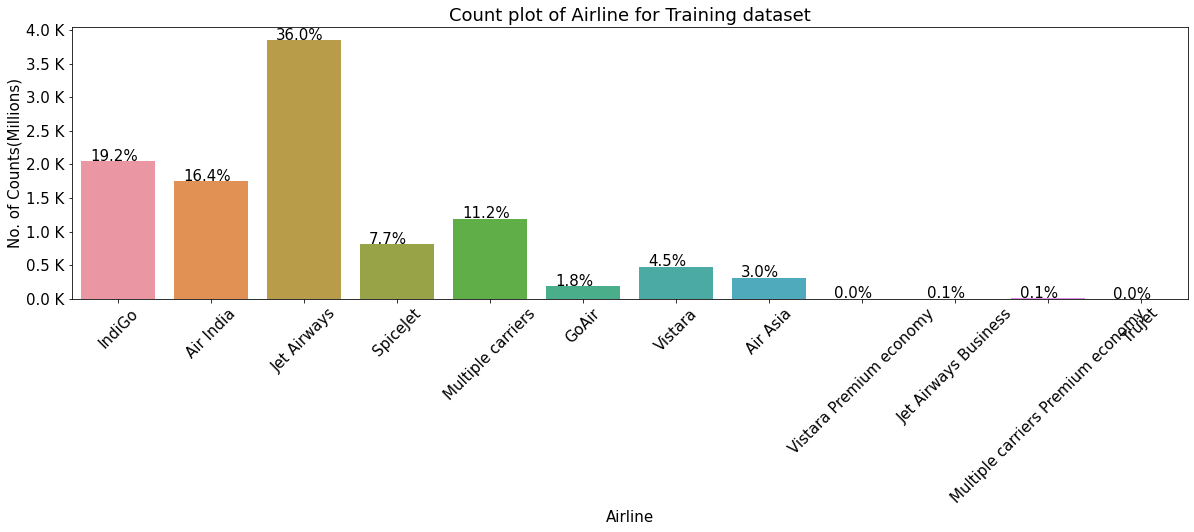

In [ ]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(20,5))
plt.title('Count plot of Airline for Training dataset')
ax = sns.countplot(x="Airline",data=train_data,linewidth=1.5)
total = len(train_data)

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

# adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels([human(item, 'K') for item in ax.get_yticks()])
ax.set_ylabel('No. of Counts(Millions)')
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Distribution of Price Over different types of Airline')

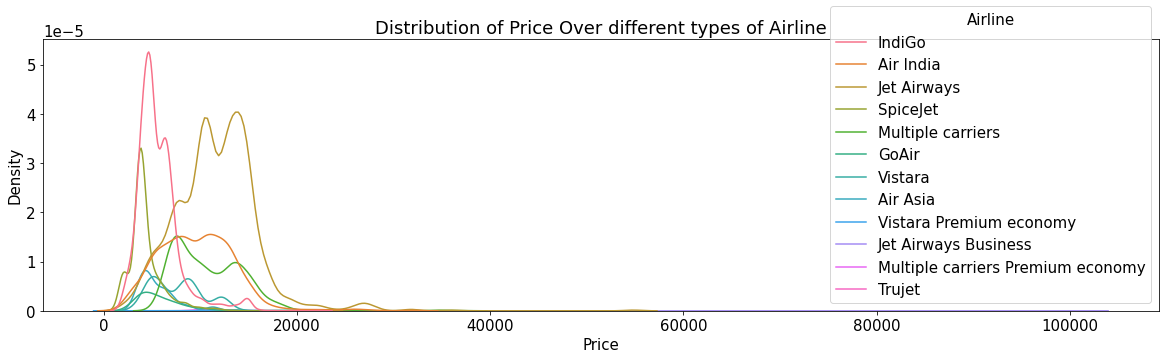

In [73]:
plt.figure(figsize=(20,5))
sns.kdeplot(x='Price',hue='Airline',data=train_data)
plt.title('Distribution of Price Over different types of Airline')

> - From above Stats and plots we say that most used Airline is Jet Airways with 36.0%
> - There are total 12 Unique Airlines. which is ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet'] 

#### Source EDA

In [ ]:
source_stats = train_data.Source.describe().values
print("Total Source present in dataset: ",source_stats[0])
print('Total Missing values are: ',train_data.Source.isnull().sum())
print('Total unique Source are: ',source_stats[1])
print('Top Source is {} with Frequency {}'.format(source_stats[2],source_stats[3]))

Total Airline present in dataset:  10683
Total Missing values are:  0
Total unique Airline are:  5
Top Airline is Delhi with Frequency 4537


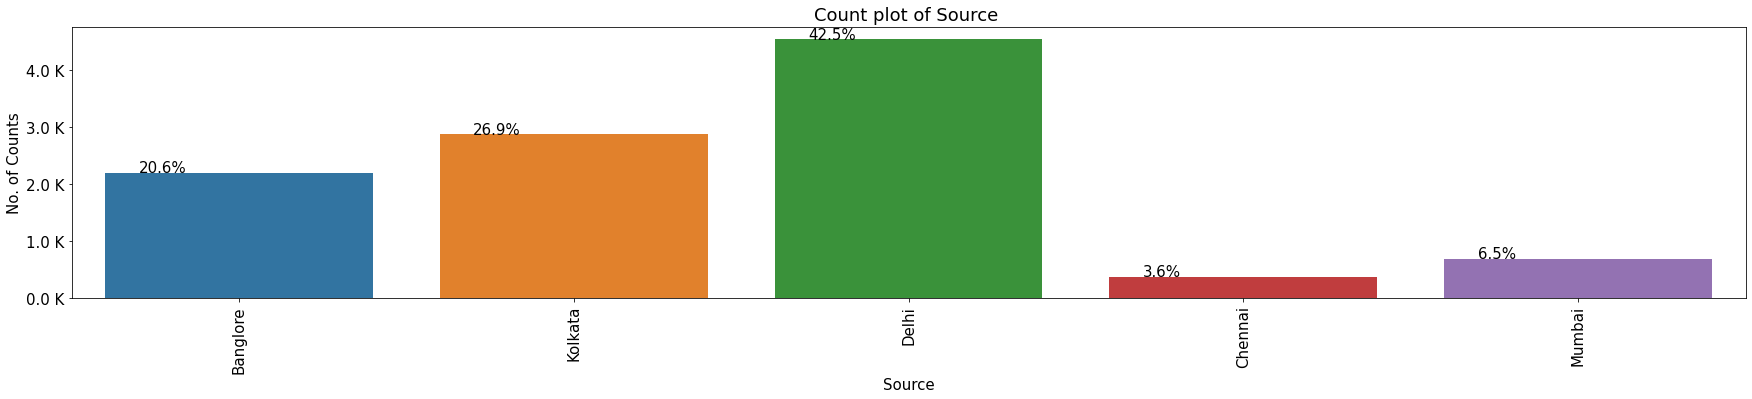

In [ ]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(30,5))
plt.title("Count plot of Source ")
ax = sns.countplot(x='Source',data=train_data,linewidth=1.5)
total = len(train_data)

for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.1,p.get_height()+5))

ax.set_yticklabels([human(item,'K') for item in ax.get_yticks()])
ax.set_ylabel('No. of Counts')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Distribution of Price over Source')

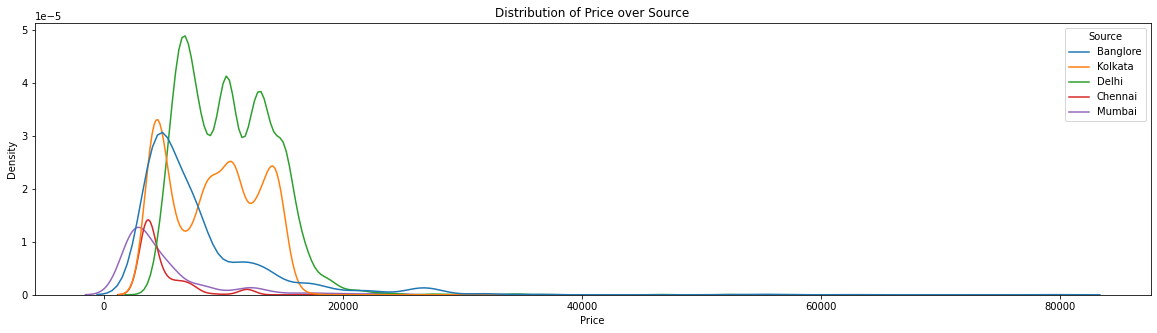

In [9]:
plt.figure(figsize=(20,5))
sns.kdeplot(x='Price',hue='Source',data=train_data)
plt.title('Distribution of Price over Source')

> - From above Stats and plots we say that most of the user Travel from Delhi,Kolkata and Banglore.
> - There are total 5 Unique Source of travel. which is ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

#### Destination EDA

In [ ]:
destination_stats = train_data.Destination.describe().values
print('Total Destination present in dataset: ',destination_stats[0])
print('Total Missing values are: ',train_data.Destination.isnull().sum())
print('Total Unique Destination are: ',destination_stats[1])
print('Top Destination is {} with Frequency {}'.format(destination_stats[2],destination_stats[3]))

Total Destination present in dataset:  10683
Total Missing values are:  0
Total Unique Destination are:  6
Top Destination is Cochin with Frequency 4537


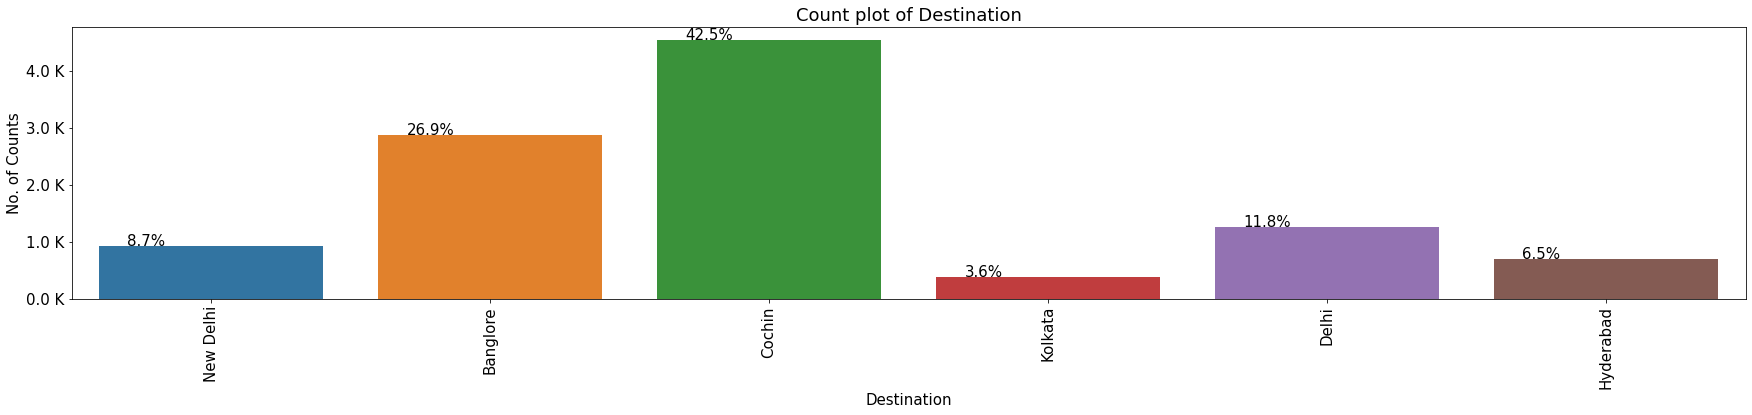

In [ ]:
plt.rcParams['font.size'] =15.0
plt.figure(figsize=(30,5))
plt.title('Count plot of Destination')
ax = sns.countplot(x='Destination',data=train_data,linewidth=1.5)
total = len(train_data)

for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.1,p.get_height()+5))

ax.set_yticklabels([human(item,'K') for item in ax.get_yticks()])
ax.set_ylabel("No. of Counts")
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Distribution of Price over Destination')

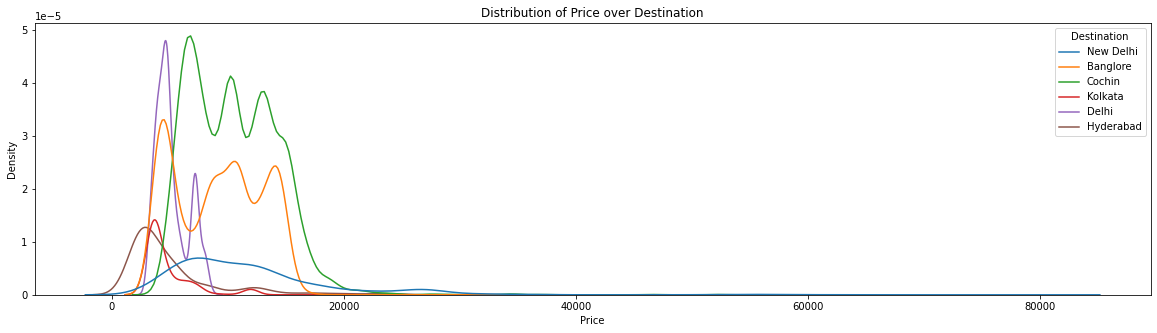

In [10]:
plt.figure(figsize=(20,5))
sns.kdeplot(x='Price',hue='Destination',data=train_data)
plt.title('Distribution of Price over Destination')

> - From above Stats and plots we say that most of the user Travel To Cochin, Banglore, Delhi.
> - There are total 5 Unique Destination of travel. which is ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']

#### Route EDA

In [ ]:
route_stats = train_data.Route.describe().values
print('Total Route present in dataset: ',route_stats[0])
print('Total Missing values are: ',train_data.Route.isnull().sum())
print('Total Unique Routes are: ',route_stats[1])
print('Top Route is {} with frequency {}'.format(route_stats[2],route_stats[3]))

Total Route present in dataset:  10682
Total Missing values are:  1
Total Unique Routes are:  128
Top Route is DEL → BOM → COK with frequency 2376


In [ ]:
from collections import Counter
route_count = Counter(list(train_data['Route']))
route_count.most_common(10)

[('DEL → BOM → COK', 2376),
 ('BLR → DEL', 1552),
 ('CCU → BOM → BLR', 979),
 ('CCU → BLR', 724),
 ('BOM → HYD', 621),
 ('CCU → DEL → BLR', 565),
 ('BLR → BOM → DEL', 402),
 ('MAA → CCU', 381),
 ('DEL → HYD → COK', 326),
 ('DEL → JAI → BOM → COK', 240)]

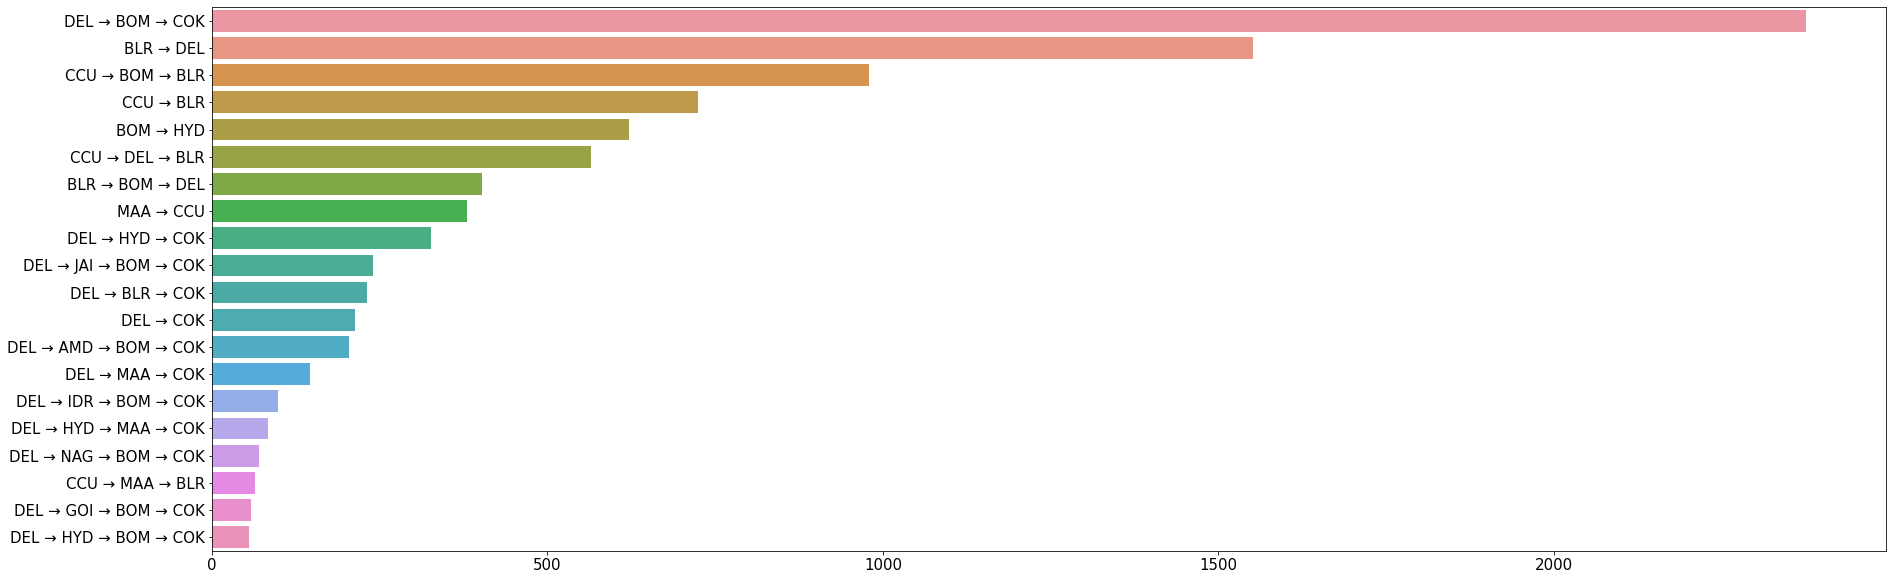

In [ ]:
top_20_route = route_count.most_common(20)
top_20_route = dict(top_20_route)
values = [i for i in top_20_route.values()]
plt.figure(figsize=(30,10))
sns.barplot(y=list(top_20_route.keys()),x=values)

> - From above Stats and plots we say that most of the Airline Route path is DEL-BOM-COK, BLR → DEL, CCU → BOM → BLR
> - There are total 128 Unique Route paths.
> - And one values missing from dataset

#### Stop EDA

In [ ]:
total_stop_stats = train_data.Total_Stops.describe().values
print('Total Stop present in dataset: ',total_stop_stats[0])
print('Total Missing values are: ',train_data.Total_Stops.isnull().sum())
print('Total Unique Stop values are: ',total_stop_stats[1])
print('Top Stop are {} with frequency {} '.format(total_stop_stats[2],total_stop_stats[3]))

Total Stop present in dataset:  10682
Total Missing values are:  1
Total Unique Stop values are:  5
Top Stop are 1 stop with frequency 5625 


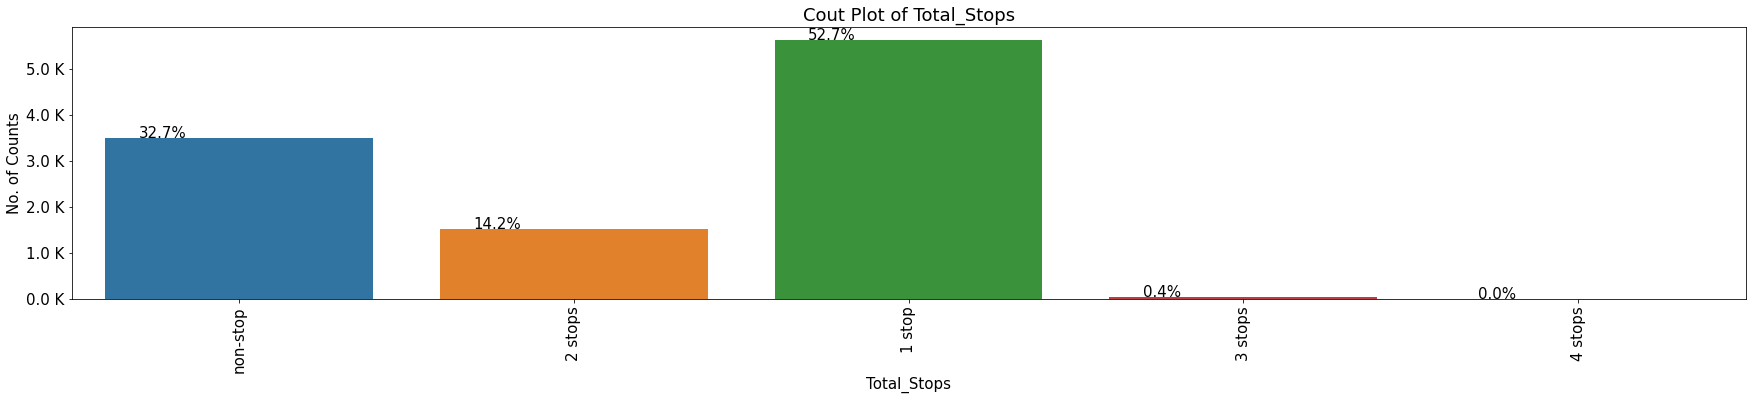

In [ ]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(30,5))
plt.title('Cout Plot of Total_Stops')
ax = sns.countplot(x= 'Total_Stops',data=train_data,linewidth=1.5)
total = len(train_data)

for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.1,p.get_height()+5))

ax.set_yticklabels([human(item,'K') for item in ax.get_yticks()])
ax.set_ylabel('No. of Counts')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Distribution of Price over total_stops')

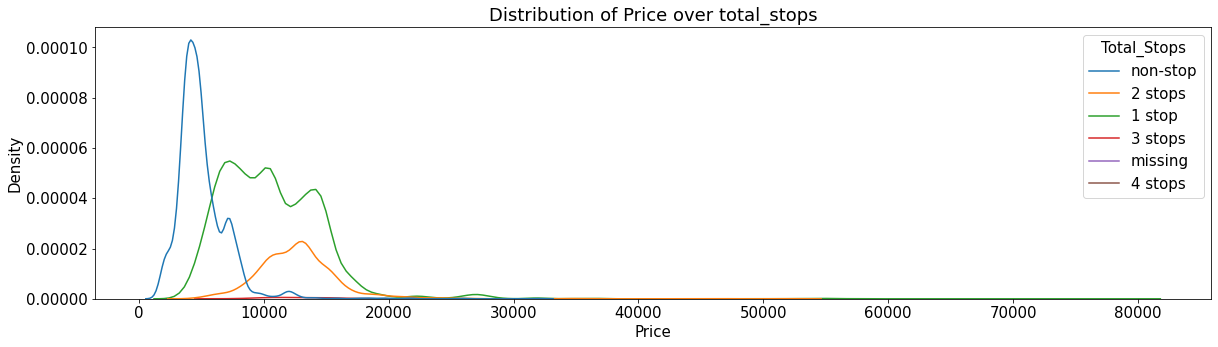

In [74]:
plt.figure(figsize=(20,5))
sns.kdeplot(x='Price',hue='Total_Stops',data=train_data)
plt.title('Distribution of Price over total_stops')

> - From above Stats and plots we say that most of the Airline take at least one stop during travel.
> - There are total 5 types Unique Stops during Travel. which is ['non-stop', '2 stops', '1 stop', '3 stops', 'missing', '4 stops'].
> - For 3_stops and 4_stops negligible record are present, Because No one want to stop 3 to 4 time during travel, as compare to travel distance.

# Feature Engineering

# Handling NaN with new Feature "missing" because NaN values are present in categorical feature



In [14]:
# Here we handle NaN values
def impute_nan(mean_without,variable):
  # Here replacing all NaN values with 'missing' values
  train_data[variable] = np.where(train_data[variable].isnull(),'missing',train_data[variable])

In [15]:
for feature in range(len(train_data.columns)-1):
  impute_nan(train_data,train_data.columns[feature])

In [16]:
# Checking any missing values are left or not
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#Handling Numerical Data


> From description we can see that Data_of_journey is a object data type.
Therefore,we have to convert this into timestamp so as to use this columns properly for prediction<br> 
> For this we require pandas to_datatime to convert objeect data type to datetime dtype<br>
> .dt.day method will extract only day of that date<br>
> .dt.month method will extract only month of that date

---







In [17]:
# Here we are converting Date_of_Journey feature into Journey_day,Journey_month,Journey_year using pandas to_datetime()
train_data['Journey_day'] =  pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
train_data['Journey_year'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.year

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [18]:
# Now we don't need Date_of_Journey feature any more,so we can just remove it
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [ ]:
# After dropping Date_of_Journey Feature
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
train_data.Journey_year.describe()

count    10683.0
mean      2019.0
std          0.0
min       2019.0
25%       2019.0
50%       2019.0
75%       2019.0
max       2019.0
Name: Journey_year, dtype: float64

Text(0.5, 1.0, 'Distribution of Journey_year')

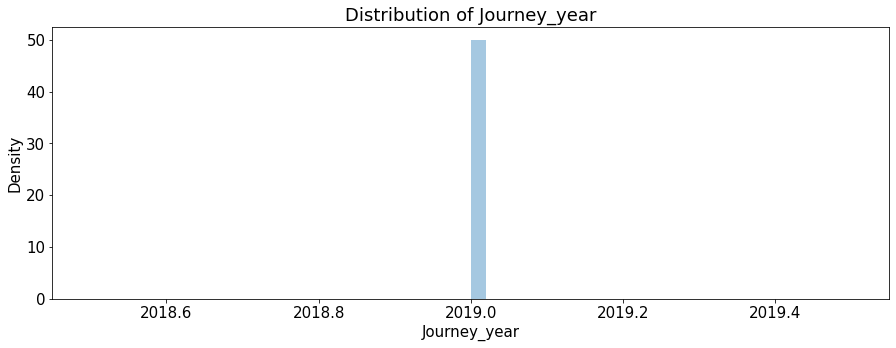

In [75]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize = (15, 5)) 
sns.distplot(train_data.Journey_year,kde=True)
plt.title('Distribution of Journey_year')

In [48]:
np.arange(0,21)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

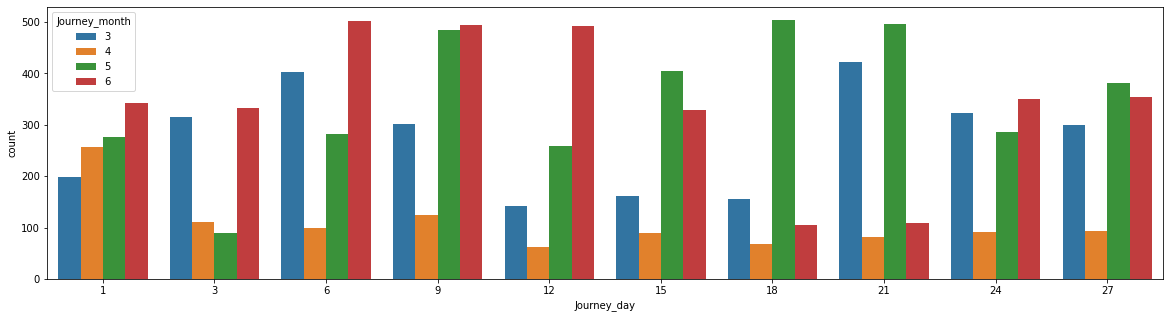

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(x='Journey_day',hue='Journey_month',data=train_data)

([<matplotlib.axis.XTick at 0x7f1f1eb38790>,
 <a list of 31 Text major ticklabel objects>)

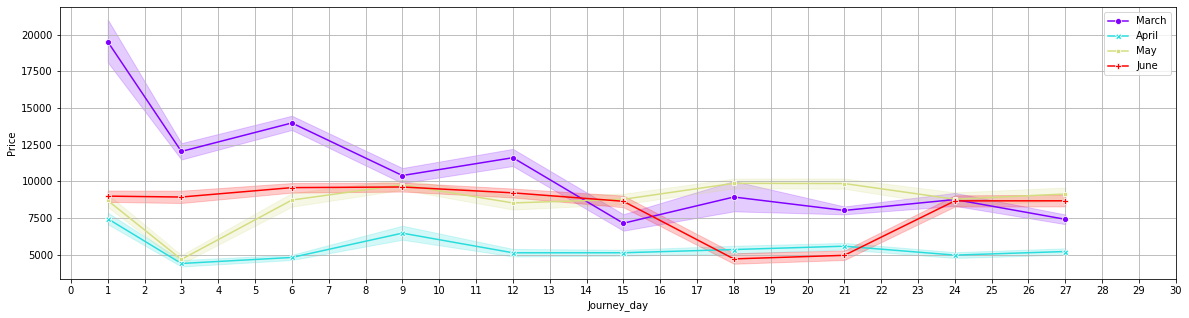

In [49]:
plt.figure(figsize=(20,5))
plt.grid()
sns.lineplot(x='Journey_day',y='Price',hue='Journey_month',data=train_data,palette='rainbow',style='Journey_month',markers=True,dashes=False)
plt.legend(['March','April','May','June'])
plt.xticks(np.arange(0,31))

> - From above stats and plot we say that all Journey year are 2019.
> - Fight Price high in March Month till 13 March in 2019.
> - In whole April month Fight Price is low as Compare to other Months.

In [20]:
# Now here we are converting Dep_Time into Hours and Minute
train_data['Dep_hour'] =  pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

# After Converting Dep_Time into Dep_hour and Dep_min we can just remove Dep_Time
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [ ]:
# After removing Dep_Time
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [ ]:
train_data.Dep_hour.describe()

count    10683.000000
mean        12.490686
std          5.748650
min          0.000000
25%          8.000000
50%         11.000000
75%         18.000000
max         23.000000
Name: Dep_hour, dtype: float64

([<matplotlib.axis.XTick at 0x7f1f1dccdcd0>,
 <a list of 25 Text major ticklabel objects>)

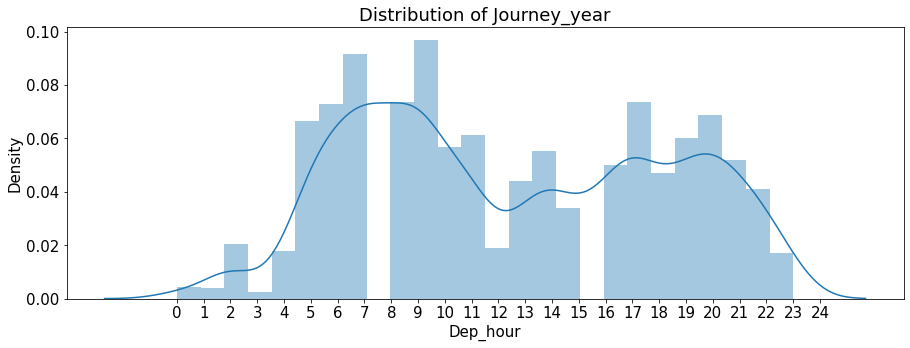

In [54]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize = (15, 5)) 
sns.distplot(train_data.Dep_hour,kde=True)
plt.title('Distribution of Journey_year')
plt.xticks(np.arange(0,25))

([<matplotlib.axis.XTick at 0x7f1f15106c50>,
 <a list of 25 Text major ticklabel objects>)

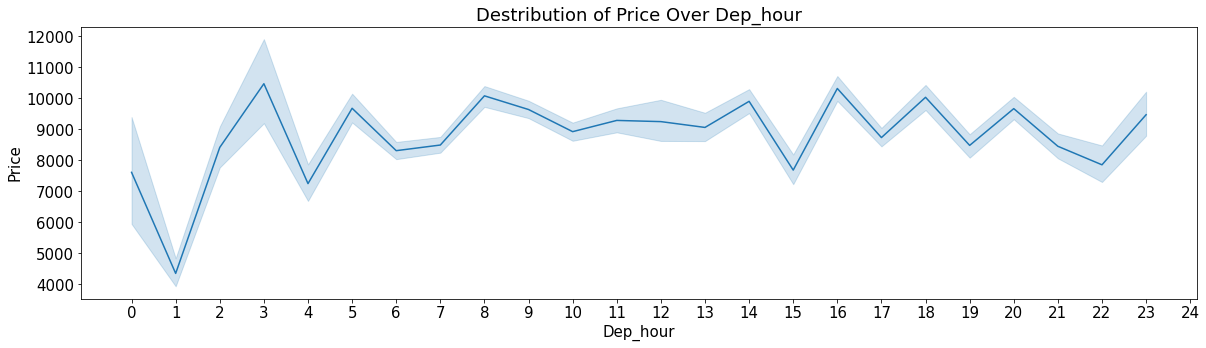

In [60]:

plt.figure(figsize=(20,5))
sns.lineplot(x=train_data['Dep_hour'],y=train_data['Price'])
plt.title('Destribution of Price Over Dep_hour')
plt.xticks(np.arange(0,25))

> - From above stats and plots we say that in mid night Flight Price is less as compare to day.
> - From 1 Am to 4-5 Am Flight Price is low.

In [24]:
# Now for same Arrival_Time
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Now we Drop Arrival_Time
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
# After removing Arrival_Time
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
train_data.Arrival_hour.describe()

count    10683.000000
mean        13.348778
std          6.859125
min          0.000000
25%          8.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: Arrival_hour, dtype: float64

([<matplotlib.axis.XTick at 0x7f1f150fe650>,
 <a list of 25 Text major ticklabel objects>)

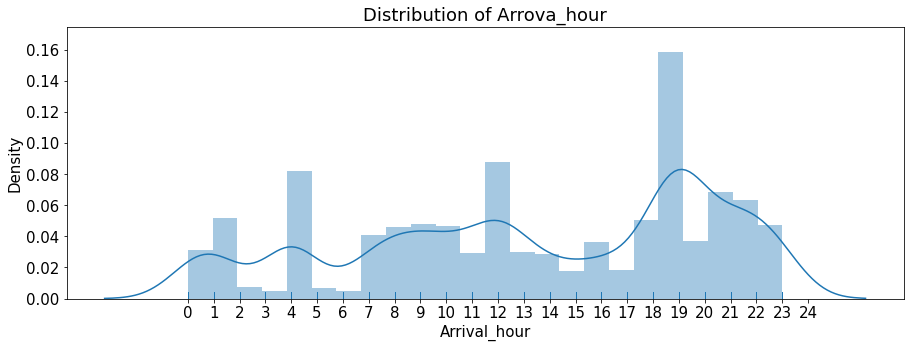

In [61]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize = (15, 5)) 
sns.distplot(train_data.Arrival_hour,kde=True,bins=24,rug=True)
plt.title('Distribution of Arrova_hour')
plt.xticks(range(0,25))

([<matplotlib.axis.XTick at 0x7f1f1deacb90>,
 <a list of 25 Text major ticklabel objects>)

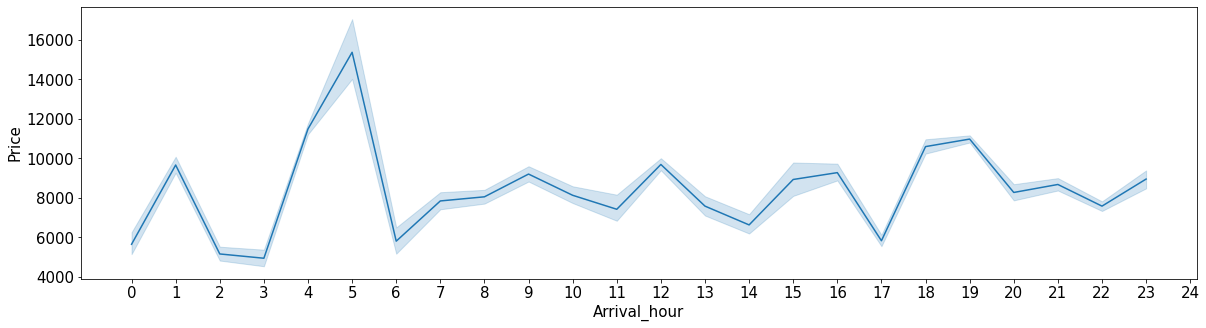

In [62]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Arrival_hour',y='Price',data=train_data)
plt.xticks(range(0,25))

In [63]:
# Time taken by plane to reach destination is called Duration
# It is the difference Between Dep_Time and Arrival_Time

# Now we store all Duration into a list
duration = list(train_data['Duration'])

for each in range(len(duration)):
  # Here we are chceking if duration are present in hour and minutes or Not
  if (len(duration[each].split()) !=2 ):      
    if 'h' in duration[each]:                                                
      duration[each] = duration[each].strip() + ' 0m'                             # Adding 0 Minute where Minutes are not present
    else:
      duration[each] = '0h ' + duration[each]                                     # Adding 0 Hour where Hour are not present

In [64]:
# storing hours and mins in a list
duration_hours = []
duration_mins = []
for each in range(len(duration)):
  duration_hours.append(int(duration[each].split(sep = 'h')[0]))                # Extracting hours from duration
  duration_mins.append(int(duration[each].split(sep = 'm')[0].split()[-1]))     # Extracting only minutes from duration

In [65]:
# Storing Duration_hours and Duration_mins into dataframe
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [66]:
# Now Dropping Duration feature from original dataframe
train_data.drop(['Duration'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
train_data.Duration_hours.describe()

count    10683.000000
mean        10.246092
std          8.495414
min          0.000000
25%          2.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: Duration_hours, dtype: float64

In [ ]:
for i in range(90,101):
  print(i,'th percentile is',np.percentile(train_data['Duration_hours'],i))

90 th percentile is 24.0
91 th percentile is 24.0
92 th percentile is 25.0
93 th percentile is 25.0
94 th percentile is 26.0
95 th percentile is 26.0
96 th percentile is 27.0
97 th percentile is 27.0
98 th percentile is 29.0
99 th percentile is 31.0
100 th percentile is 47.0


In [ ]:
for i in np.arange(99.1,100,0.1):
  print('{:.1f} th percentile is {}'.format(i,np.percentile(train_data['Duration_hours'],i)))

99.1 th percentile is 32.0
99.2 th percentile is 33.0
99.3 th percentile is 34.0
99.4 th percentile is 36.0
99.5 th percentile is 37.0
99.6 th percentile is 37.0
99.7 th percentile is 38.0
99.8 th percentile is 38.0
99.9 th percentile is 38.0
100.0 th percentile is 47.0


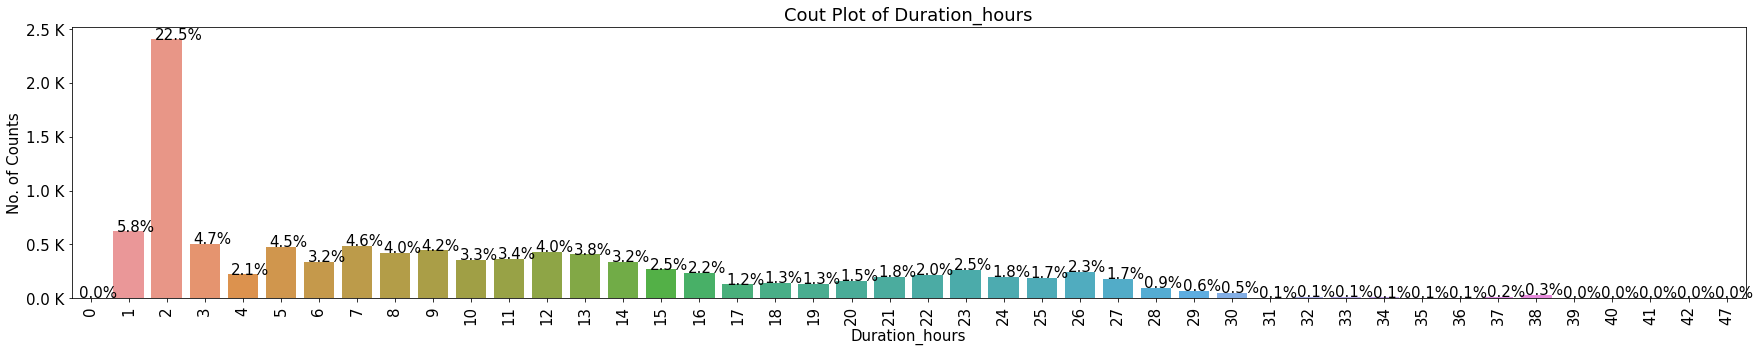

In [ ]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(30,5))
plt.title('Cout Plot of Duration_hours')
ax = sns.countplot(x= 'Duration_hours',data=train_data,linewidth=1.5)
total = len(train_data)

for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.1,p.get_height()+5))

ax.set_yticklabels([human(item,'K') for item in ax.get_yticks()])
ax.set_ylabel('No. of Counts')
plt.xticks(rotation = 90)
plt.show()

([<matplotlib.axis.XTick at 0x7f1f148a0e50>,
 <a list of 48 Text major ticklabel objects>)

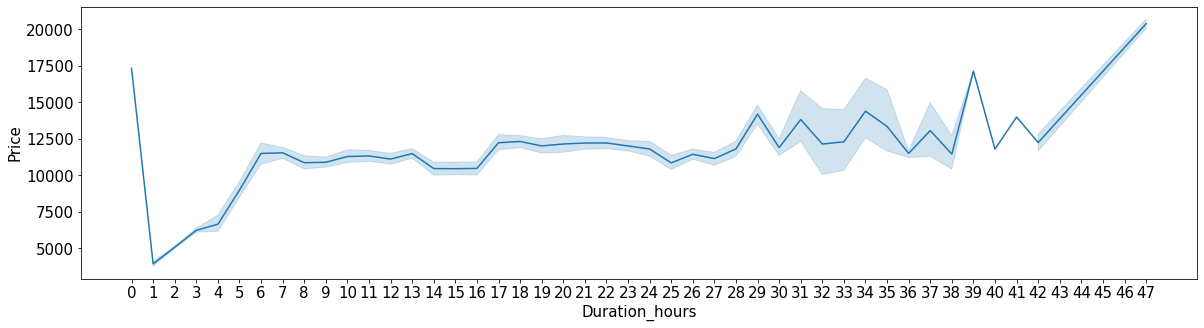

In [70]:
plt.figure(figsize=(20,5))
sns.lineplot(train_data['Duration_hours'],train_data['Price'])
plt.xticks(range(0,48))

Text(0.5, 1.0, 'Distribution of Duration_hours')

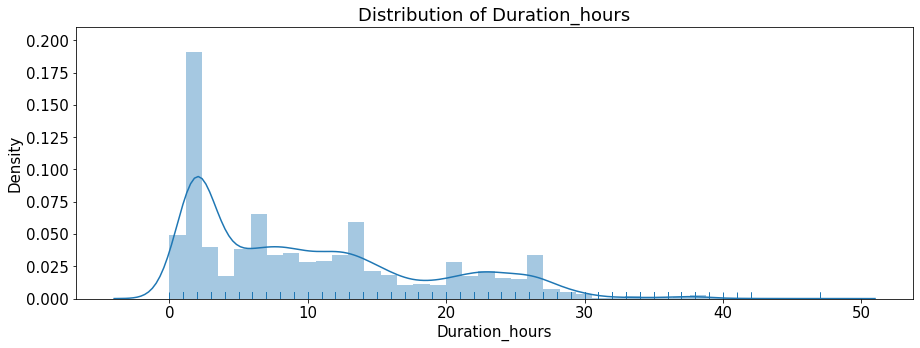

In [71]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize = (15, 5)) 
sns.distplot(train_data.Duration_hours,kde=True,rug=True)
plt.title('Distribution of Duration_hours')

> - From above stats and plots we say that 22.5% Travel duration Takes 2 Hours.
> - And 50.0% Travel duration takes 8 Hours.
> - There are very few flights which take more than 32 hours.
> - And As Travel duration increase Flight Price also increases.

# Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,
> 1. Nominal_data --> data are not in any order --> OneHotEncoder is used in this case
> 2. Ordinal_data --> data are in order --> LabelEncoder is used in this case

In [ ]:
# Count all unique values present in Airline
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
airline_name = train_data['Airline'].unique()
airline_name

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

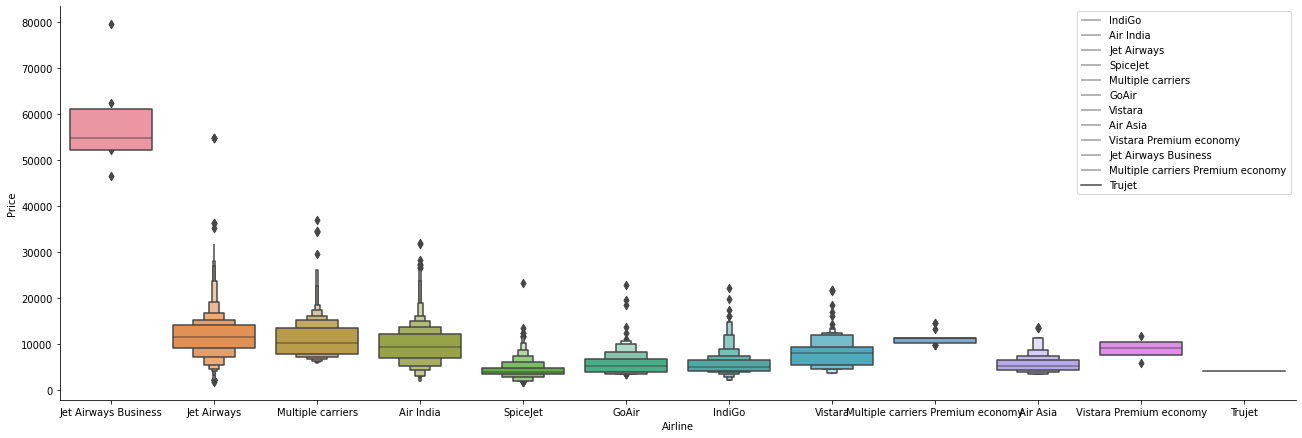

In [ ]:
# From graph we can see that Jet Airways Business have the highest Price
# Apart from the first Airline almost all are having similar median

# Airline Vs Price
airline_name = train_data['Airline'].unique()

sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),kind='boxen',height =6 ,aspect= 3,legend=True)
plt.legend(airline_name)
plt.show()

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_data['Airline']
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


# Preprocessing Source feature

In [ ]:
train_data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

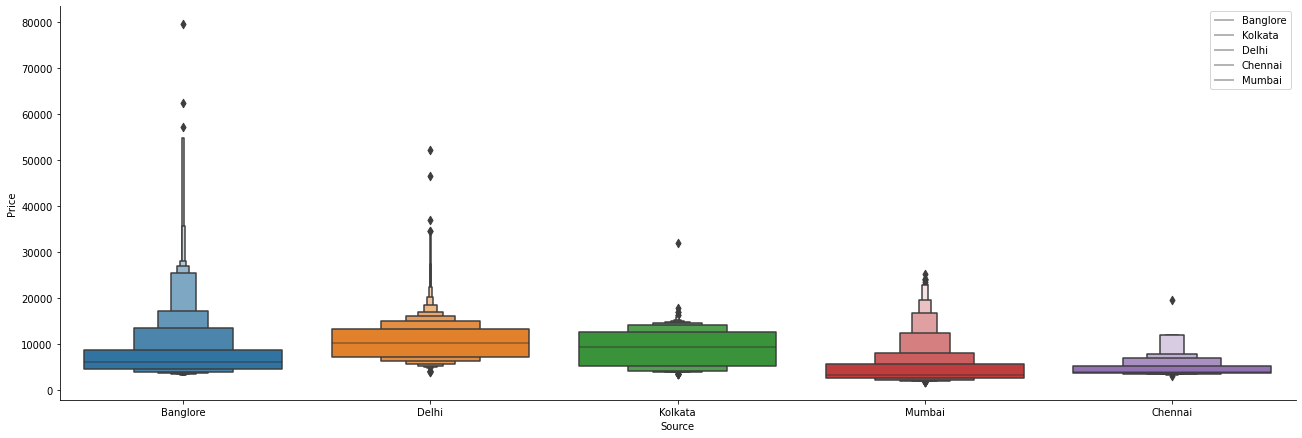

In [ ]:
source_name = train_data['Source'].unique()
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.legend(source_name)
plt.show()

In [ ]:
# As Source is Norminal Categorical data we will perform OneHotEncoding
source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# Preprocesing Destination feature

In [ ]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

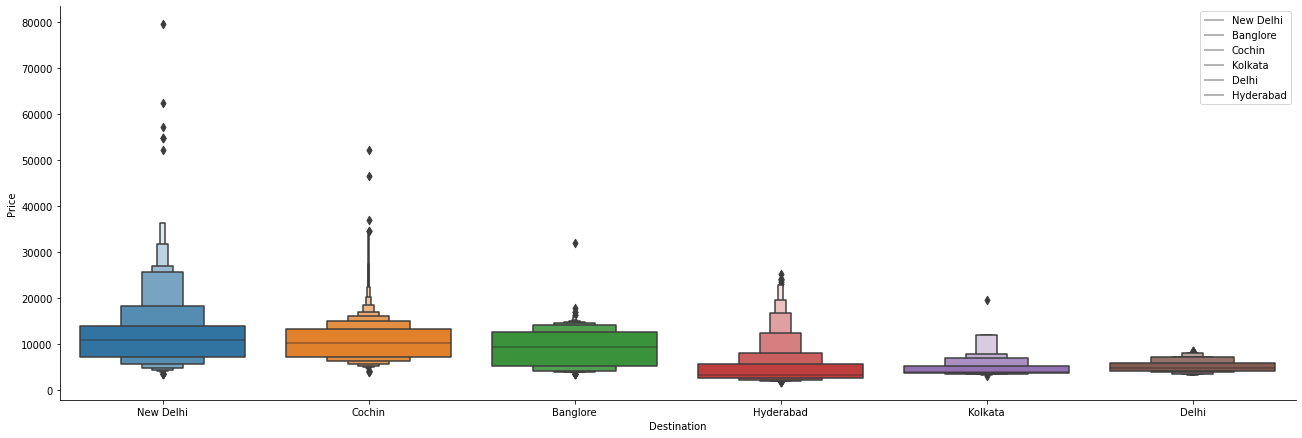

In [ ]:
destination_name = train_data['Destination'].unique()
sns.catplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.legend(destination_name)
plt.show()

In [ ]:
# Converting Destination into OneHotEncoding using get_dummies()
destination = train_data['Destination']
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other, so we just Dropping Additional_Info and Route
train_data.drop(['Additional_Info','Route'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
missing        1
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here values are assigned with corresponding keys
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'missing':5},inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
train_data[train_data['Total_Stops']==5]

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
9039,Air India,Delhi,Cochin,5,7480,6,5,2019,9,45,9,25,23,40


In [ ]:
# Concatenate dataframe --> train_data + Airline + source + destination
data_train = pd.concat([train_data,Airline,source,destination],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Now dropping Airline, Source, Destination
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Now after all preprocessing shape of data are as follows
data_train.shape

(10683, 31)

# Test Set

In [ ]:
test_data = pd.read_excel(r'Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
# Here we handle NaN values
def impute_nan(mean_without,variable):
  # Here replacing all NaN values with 'missing' values
  test_data[variable] = np.where(test_data[variable].isnull(),'missing',test_data[variable])

for feature in range(len(test_data.columns)-1):
  impute_nan(test_data,test_data.columns[feature])



In [ ]:
# Here we are converting Date_of_Journey feature into Journey_day,Journey_month,Journey_year using pandas to_datetime()
test_data['Journey_day'] =  pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
test_data['Journey_year'] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.year
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [ ]:
# Now here we are converting Dep_Time into Hours and Minute
test_data['Dep_hour'] =  pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
# After Converting Dep_Time into Dep_hour and Dep_min we can just remove Dep_Time
test_data.drop(['Dep_Time'],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,2019,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,2019,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55


In [ ]:
# Now for same Arrival_Time
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
# Now we Drop Arrival_Time
test_data.drop(['Arrival_Time'],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [ ]:
# Time taken by plane to reach destination is called Duration
# It is the difference Between Dep_Time and Arrival_Time

# Now we store all Duration into a list
test_duration = list(test_data['Duration'])

for each in range(len(test_duration)):
  # Here we are chceking if duration are present in hour and minutes or Not
  if (len(test_duration[each].split()) !=2 ):      
    if 'h' in test_duration[each]:                                                
      test_duration[each] = test_duration[each].strip() + ' 0m'                             # Adding 0 Minute where Minutes are not present
    else:
      test_duration[each] = '0h ' + test_duration[each]                                     # Adding 0 Hour where Hour are not present

# storing hours and mins in a list
test_duration_hours = []
test_duration_mins = []
for each in range(len(test_duration)):
  test_duration_hours.append(int(test_duration[each].split(sep = 'h')[0]))                # Extracting hours from duration
  test_duration_mins.append(int(test_duration[each].split(sep = 'm')[0].split()[-1]))     # Extracting only minutes from duration

# Storing Duration_hours and Duration_mins into dataframe
test_data['Duration_hours'] = test_duration_hours
test_data['Duration_mins'] = test_duration_mins
# Now Dropping Duration feature from original dataframe
test_data.drop(['Duration'],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,2,50


In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
test_Airline = test_data['Airline']
test_Airline = pd.get_dummies(Airline,drop_first=True)

# As Source is Norminal Categorical data we will perform OneHotEncoding
test_source = test_data[['Source']]
test_source = pd.get_dummies(source,drop_first=True)

# Converting Destination into OneHotEncoding using get_dummies()
test_destination = test_data['Destination']
test_destination = pd.get_dummies(destination,drop_first=True)

In [ ]:
# Dropping Additional_Info and Route
test_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here values are assigned with corresponding keys
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'missing':5},inplace=True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,23,55,2,45,2,50


In [ ]:
# Concatinating test_data,test_Airline,test_source,test_destination
data_test = pd.concat([test_data,test_Airline,test_source,test_destination],axis=1)

# Now dropping Airline, Source, Destination
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1.0,6.0,6.0,2019.0,17.0,30.0,4.0,25.0,10.0,55.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,12.0,5.0,2019.0,6.0,20.0,10.0,20.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,21.0,5.0,2019.0,19.0,15.0,19.0,0.0,23.0,45.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,21.0,5.0,2019.0,8.0,0.0,21.0,0.0,13.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.0,24.0,6.0,2019.0,23.0,55.0,2.0,45.0,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable.<br>
Following are some of the feature selection methods.
> 1. Heatmap
> 2.Feature_importance
> 3. SelectKBest

In [ ]:
data_train.shape


(10683, 31)

In [ ]:
data_train.drop(['Journey_year'],axis=1,inplace=True)
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi'],
      dtype='object')

In [ ]:
X = data_train.loc[:,['Total_Stops',  'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

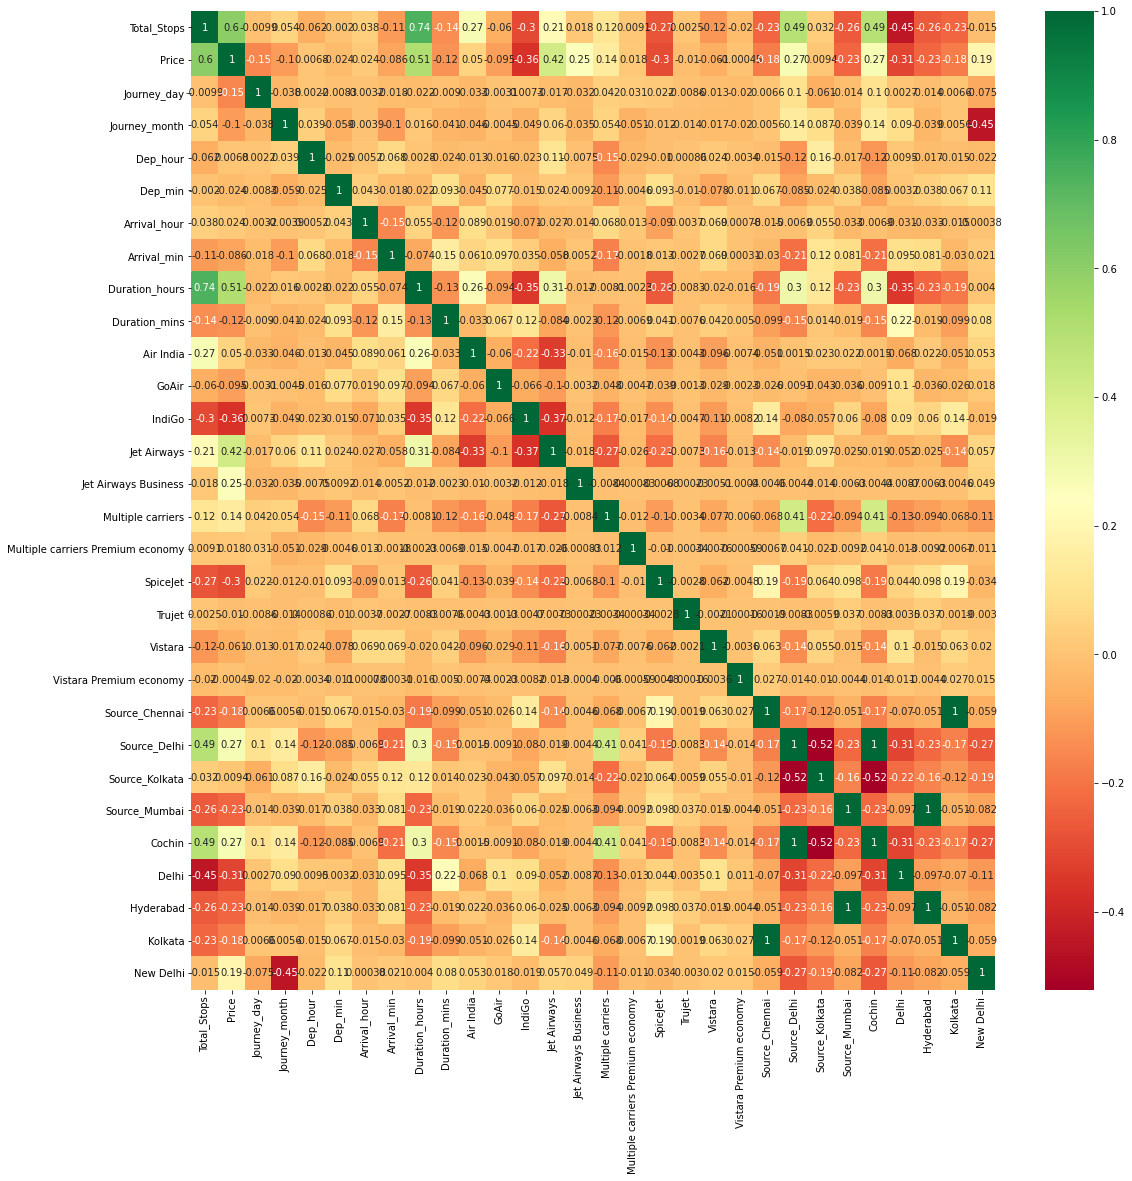

In [ ]:
# Finds Correlation between Independent and Dependent attributes
plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)

[1.97633949e-01 1.43734452e-01 5.35069025e-02 2.46948268e-02
 2.12217267e-02 2.68926618e-02 1.89423267e-02 1.60973630e-01
 1.84386176e-02 1.02500028e-02 2.18571564e-03 1.99050345e-02
 1.28824320e-01 6.71690714e-02 1.82774506e-02 8.63535184e-04
 3.54294706e-03 1.16017037e-04 4.94982115e-03 8.45717416e-05
 5.09132957e-04 1.15831463e-02 3.45085717e-03 7.40876269e-03
 1.01664888e-02 1.33239429e-02 5.97007734e-03 5.44389533e-04
 2.48356219e-02]


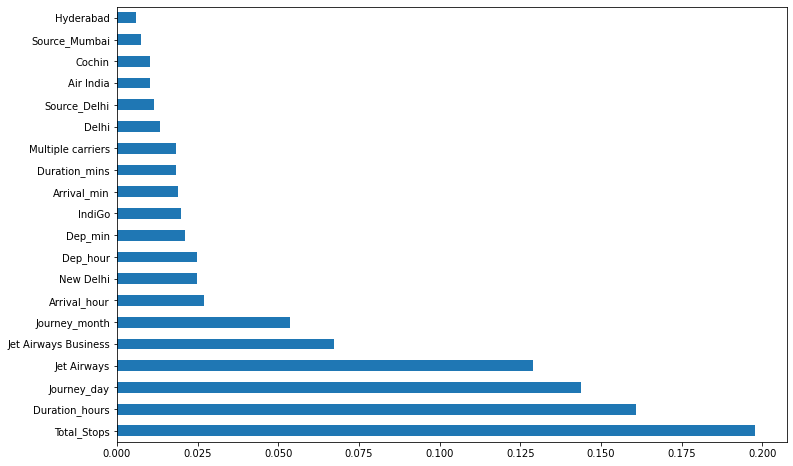

In [ ]:
# plot graph of feature importances for better visualization
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest 
> 1. Split dataset into train and test set in order to prediction w.r.t X_test
> 2. If needed do scaling of data
>> Scaling is not done in random forest
> 3. Import model
> 4. Fit the data
> 5. Predict w.r.t X_test
> 6. In regression check RSME Score
> 7. Plot graph

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train,y_train)

0.9555640277835122

In [ ]:
reg_rf.score(X_test,y_test)

0.8154790925388695

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


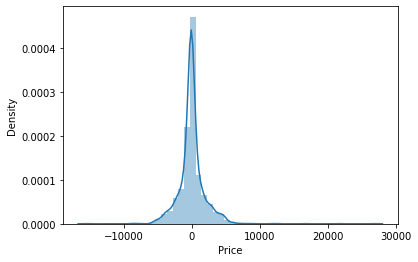

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

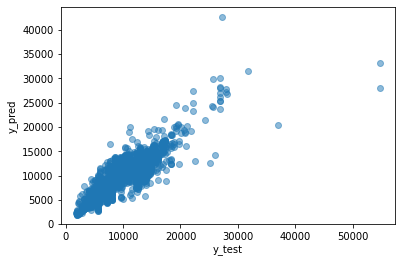

In [ ]:
# Scatter plot 
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1172.618199033152
MSE:  3844499.471200417
RMSE:  1960.739521507234


In [ ]:
metrics.r2_score(y_test,y_pred)

0.8154790925388694

# Hyperparameter Tuning
- Choose Following method for Hyper parameter Tuning
> - RandomizedSearchCV   --> Fast 
> - GridSearchCV
- Assign hyperparameters is form of dictionery
- Fit the model
- check best paramters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Randomized search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Number of feature to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# minimun number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validaton
# Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=0,n_jobs=1)


In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   5.9s
[CV] n_estimators=400, min_samples_split=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

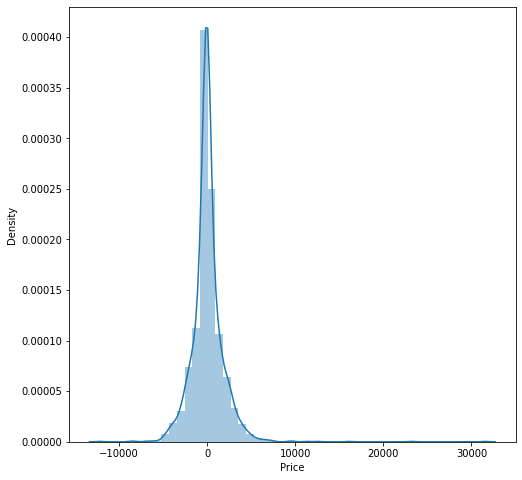

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show

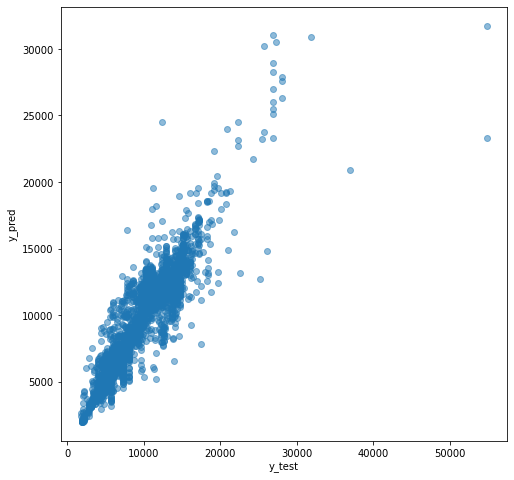

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  1140.6901046013027
MSE:  3533052.3699536766
RMSE:  1879.6415535824049


# Save the model to reuse it again


In [ ]:
import pickle 
# open a file, where you want to store the data
file = open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(rf_random,file)

In [ ]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_prediction)

0.830427332791909

In [ ]:
pip freeze > requirements.txt